<a href="https://colab.research.google.com/github/neuralsrg/EEG/blob/main/data_exploration/correlations%26svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]

Mounted at /content/drive


In [ ]:
with h5py.File('/content/drive/MyDrive/EEG_data/meaned_over_ocur_bash_phon.h5', 'r') as hdf:
  meaned_over_ocur = hdf['meaned'][:]
  X_train = hdf['train_set_x'][:]
  y_train = hdf['train_set_y'][:]
  X_test = hdf['test_set_x'][:]
  y_test = hdf['test_set_y'][:]

meaned_over_ocur.shape, X_train.shape, y_train.shape

((7, 300, 49), (104, 300, 49), (104,))

In [ ]:
with h5py.File('/content/drive/MyDrive/EEG_data/ch_names.h5', 'r') as hdf:
  ch_names = hdf['channels'][:-1]

ch_names.shape

(49,)

In [3]:
def get_covariance(vectors):
  '''
  Computes covariance vector (upper right triangle covariance matrix excluding 
  diagonal elements)

  Args:
  vectors -- np.array of shape (n, vector_size), n is a number of vectors

  Returns:
  cov_vector -- np.array of shape(n*(n-1) / 2, )
  covariance_matrix -- np.array of shape (n, n)
  '''
  n = vectors.shape[0]
  covariance_matrix = np.corrcoef(vectors)
  cov_vector = covariance_matrix[np.triu_indices(n, k=1)]

  return cov_vector, covariance_matrix

(7, 1176)

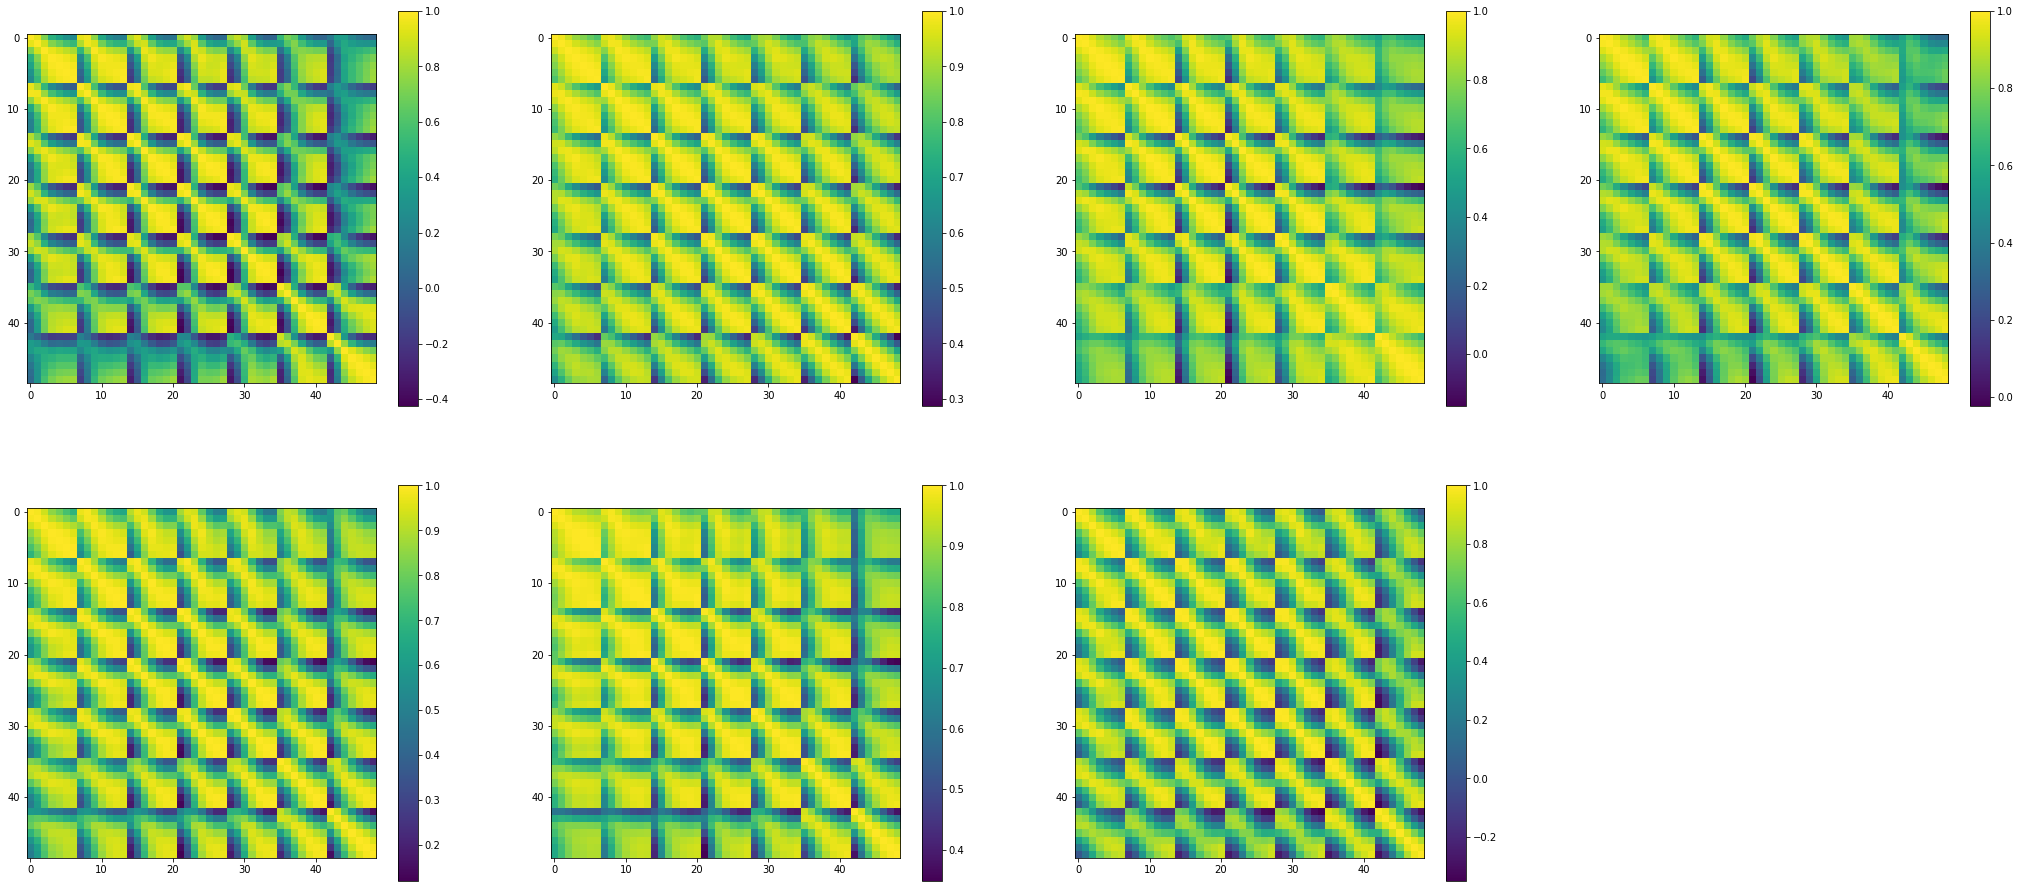

In [ ]:
electrode_correlations = np.empty((0, 1176))
fig = plt.figure(figsize=(9 * 4, 8 * 2))

for phoneme in range(7):

  triu, covariance_matrix = get_covariance(meaned_over_ocur[phoneme].T)
  electrode_correlations = np.append(electrode_correlations,
                                     np.expand_dims(triu, axis=0),
                                     axis=0)
  ax = fig.add_subplot(2, 4, phoneme + 1)
  img = ax.imshow(covariance_matrix)
  plt.colorbar(img, ax=ax)
  
electrode_correlations.shape

In [ ]:
k = 7
strings = np.array([f'L-El_{i+1}_{j+1}' for i in range(k) for j in range(k)])

row_inds, col_inds = np.triu_indices(k ** 2, k=1)
first_part, second_part = strings[row_inds], strings[col_inds]

pd_cols = [f'{f}-{s}' for f,s in zip(first_part, second_part)]

In [ ]:
df = pd.DataFrame(electrode_correlations, columns=pd_cols)
df.head(7)

,L-El_1_1-L-El_1_2,L-El_1_1-L-El_1_3,L-El_1_1-L-El_1_4,L-El_1_1-L-El_1_5,L-El_1_1-L-El_1_6,L-El_1_1-L-El_1_7,L-El_1_1-L-El_2_1,L-El_1_1-L-El_2_2,L-El_1_1-L-El_2_3,L-El_1_1-L-El_2_4,...,L-El_7_3-L-El_7_4,L-El_7_3-L-El_7_5,L-El_7_3-L-El_7_6,L-El_7_3-L-El_7_7,L-El_7_4-L-El_7_5,L-El_7_4-L-El_7_6,L-El_7_4-L-El_7_7,L-El_7_5-L-El_7_6,L-El_7_5-L-El_7_7,L-El_7_6-L-El_7_7
0,0.947922,0.724645,0.486519,0.400073,0.304988,0.251828,0.947966,0.974520,0.754976,0.435473,...,0.932748,0.834068,0.753322,0.690679,0.974897,0.928987,0.872010,0.986045,0.945987,0.984178
1,0.984830,0.941531,0.889154,0.863410,0.831464,0.800647,0.965715,0.977986,0.941581,0.875850,...,0.970896,0.899499,0.816713,0.703499,0.977251,0.926914,0.837902,0.984445,0.927485,0.977492
2,0.989303,0.933350,0.861942,0.817452,0.766527,0.711155,0.934685,0.985985,0.948102,0.851614,...,0.981277,0.947389,0.913288,0.865205,0.990520,0.970202,0.930461,0.993263,0.964946,0.987591
3,0.989880,0.944823,0.869802,0.813730,0.749349,0.680296,0.960155,0.981748,0.952103,0.858255,...,0.963854,0.903363,0.847308,0.781566,0.983406,0.949689,0.892837,0.989135,0.949824,0.984065
4,0.989165,0.934798,0.850794,0.805182,0.743015,0.694093,0.974234,0.991135,0.944207,0.828073,...,0.956434,0.864039,0.779874,0.706397,0.972625,0.924891,0.868876,0.987092,0.952948,0.987247
5,0.992141,0.963705,0.928900,0.922514,0.904437,0.893207,0.975835,0.991483,0.962590,0.910119,...,0.970383,0.904726,0.847704,0.804685,0.980064,0.947414,0.915018,0.991467,0.972148,0.992993
6,0.975738,0.849490,0.633229,0.495208,0.371800,0.290107,0.976511,0.979315,0.878206,0.611119,...,0.906047,0.647220,0.395580,0.198314,0.905855,0.734703,0.562107,0.950855,0.843227,0.963292


## Classifying by the nearest covariance matrix

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(16, 10),
                          text_size=10, title='Confusion matrix'):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title=title,
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
def plot_confusion(y_train, predicted_train, y_test, predicted_test):
  '''
  Plots confusion matrices for both train and test data

  Args:
  y_train -- np.array of shape(None1, ) - true labels
  predicted_train -- np.array of shape(None1, ) - predicted labels
  y_test -- np.array of shape(None2, ) - true labels
  predicted_test -- np.array of shape(None2, ) - predicted labels
  '''
  make_confusion_matrix(y_train - 11, predicted_train, title='train data')
  make_confusion_matrix(y_test - 11, predicted_test, title='test data')

In [ ]:
def check_accuracy(X_train, y_train, X_test, y_test, measure, compute_cov=True):
  '''
  Checks classifying accuracy using measure function

  Args:
  X_train -- np.array of shape(None1, 300, 49)
  y_train -- np.array of shape(None1, )
  X_test -- np.array of shape(None2, 300, 49)
  y_test -- np.array of shape(None2, )
  measure -- callable

  Reruns:
  predictions -- python dictionary with keys 'train' & 'test'
  '''
  preds = {}
  st = ['train', 'test']
  for i, (X, y) in enumerate([(X_train, y_train), (X_test, y_test)]):

    predicted_labels = np.empty(0)

    for x in X:
      if compute_cov:
        v, _ = get_covariance(x.T)
      else:
        v = x
      predicted_labels = np.append(predicted_labels, measure(v, electrode_correlations))

    acc = np.count_nonzero(predicted_labels + 11 == y) / len(y)
    preds[st[i]] = predicted_labels
    print(f'{st[i]} accuracy: {acc * 100}%')

  return preds

#### Using corrcoef to measure distance

In [ ]:
def predict_corr(vector, correlations):
  '''
  Predicts vector label by comparing correlation distances between vectors

  Args:
  vector -- np.array, correlations vector of shape (n*(n-1) / 2, ),
  data to predict label of
  correlations -- np.array containing per label correlation vectors of shape
  (num_labels, n*(n-1) / 2)
  
  Returns:
  label - argmax over correlations
  '''
  X = np.concatenate((np.expand_dims(vector, axis=0), correlations), axis=0)
  covariance_vector = np.corrcoef(X)[0][1:]

  return np.argmax(covariance_vector)

train accuracy: 19.230769230769234%
test accuracy: 8.333333333333332%


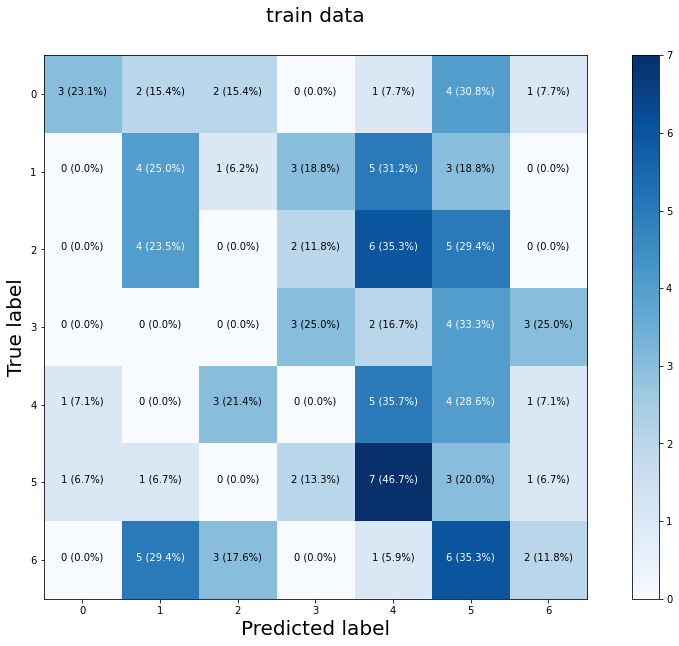

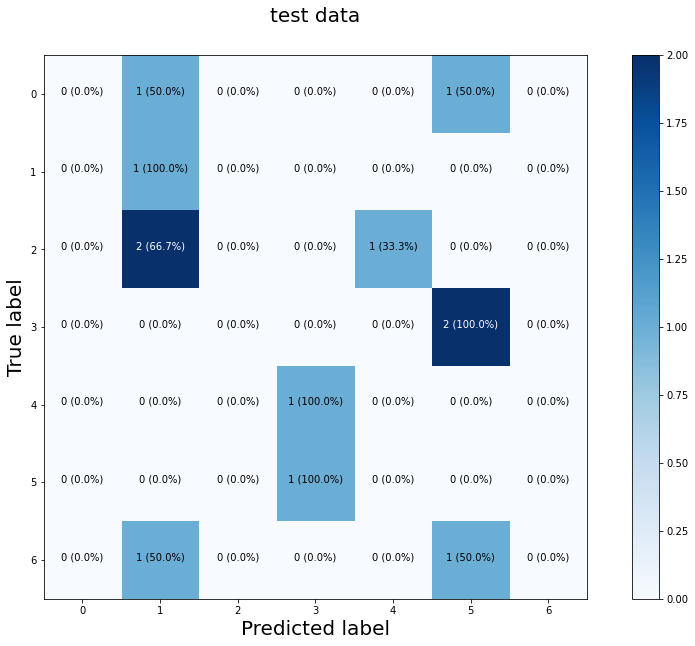

In [ ]:
predictions = check_accuracy(X_train, y_train, X_test, y_test, predict_corr)
plot_confusion(y_train, predictions['train'], y_test, predictions['test'])

#### Using cos to measure distance

In [ ]:
from scipy import spatial

def predict_cos(vector, correlations):
  '''
  Predicts vector label by comparing cosine similarities

  Args:
  vector -- np.array, correlations vector of shape (n*(n-1) / 2, ),
  data to predict label of
  correlations -- np.array containing per label correlation vectors of shape
  (num_labels, n*(n-1) / 2)
  
  Returns:
  label - argmax over correlations
  '''
  sims = [spatial.distance.cosine(vector, cor_vector) for cor_vector in correlations]
  sims = np.ones_like(sims) - sims
  return np.argmax(sims)

train accuracy: 11.538461538461538%
test accuracy: 8.333333333333332%


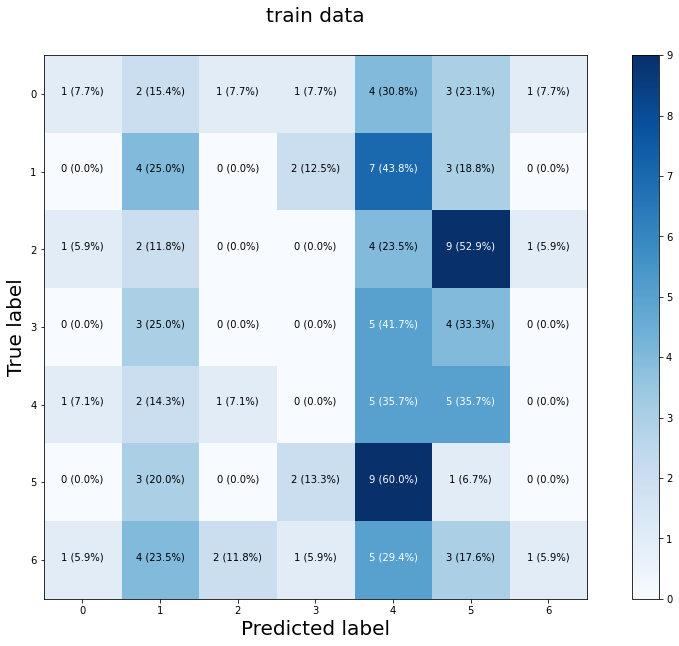

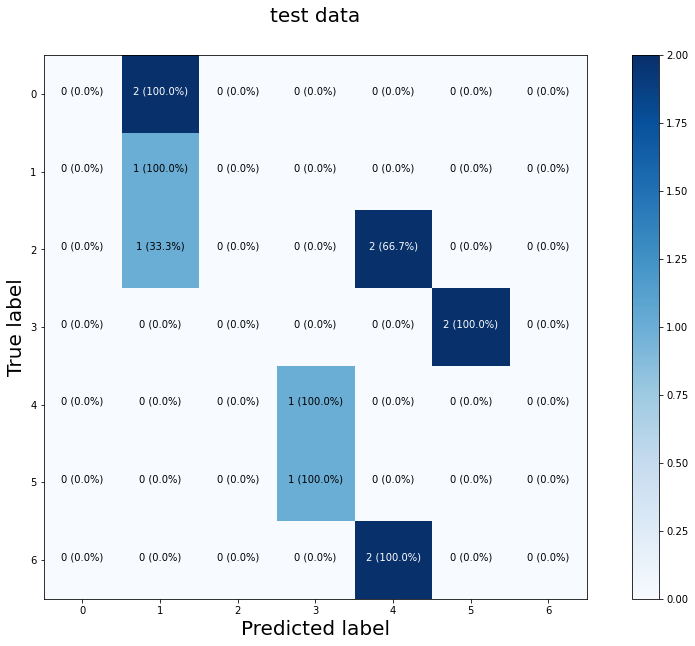

In [ ]:
predictions = check_accuracy(X_train, y_train, X_test, y_test, predict_cos)
plot_confusion(y_train, predictions['train'], y_test, predictions['test'])

#### Using min MSE

In [ ]:
def predict_norm(vector, correlations):
  '''
  Predicts vector label by comparing deviation norm

  Args:
  vector -- np.array, correlations vector of shape (n*(n-1) / 2, ),
  data to predict label of
  correlations -- np.array containing per label correlation vectors of shape
  (num_labels, n*(n-1) / 2)
  
  Returns:
  label - argmax over correlations
  '''
  norms = [np.linalg.norm(cor_vector - vector) for cor_vector in correlations]
  return np.argmin(norms)

train accuracy: 13.461538461538462%
test accuracy: 8.333333333333332%


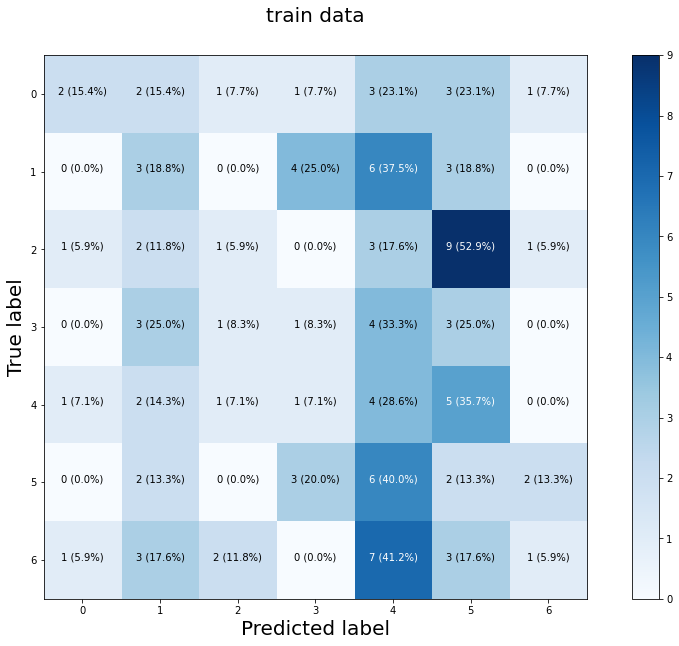

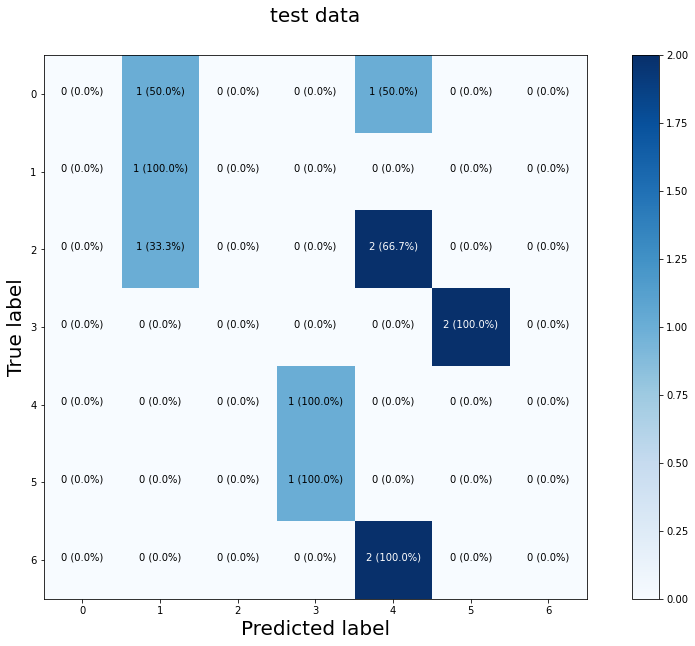

In [ ]:
predictions = check_accuracy(X_train, y_train, X_test, y_test, predict_norm)
plot_confusion(y_train, predictions['train'], y_test, predictions['test'])

## Projecting correlation vectors onto mean singular basis 

In [ ]:
def project(X):
  '''
  Projects X covarainace vectors onto orthogonal singular basis of m-dimensional space,
  where m is the number of vectors (vectors.shape[0])

  Args:
  X -- np.array of shape (None, 300, 49)
  vectors -- np.array of shape (7, 1176)

  Returns:
  projections -- np.array of shape (None, 1176)
  '''
  U, S, VT = np.linalg.svd(electrode_correlations.T, full_matrices=False)
  X_new = np.empty((0, 1176))

  for x in X:
    v, _ = get_covariance(x.T)
    v = v.reshape(-1, 1)
    X_new = np.append(X_new, (U @ U.T @ v).T, axis=0)

  return X_new

In [ ]:
X_train_new = project(X_train)
X_test_new = project(X_test)

X_train_new.shape, X_test_new.shape

((104, 1176), (12, 1176))

train accuracy: 22.115384615384613%
test accuracy: 8.333333333333332%


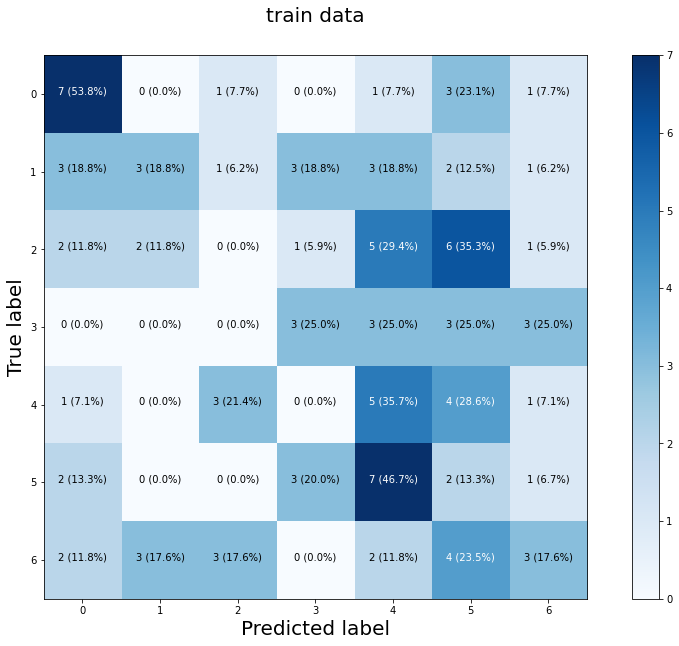

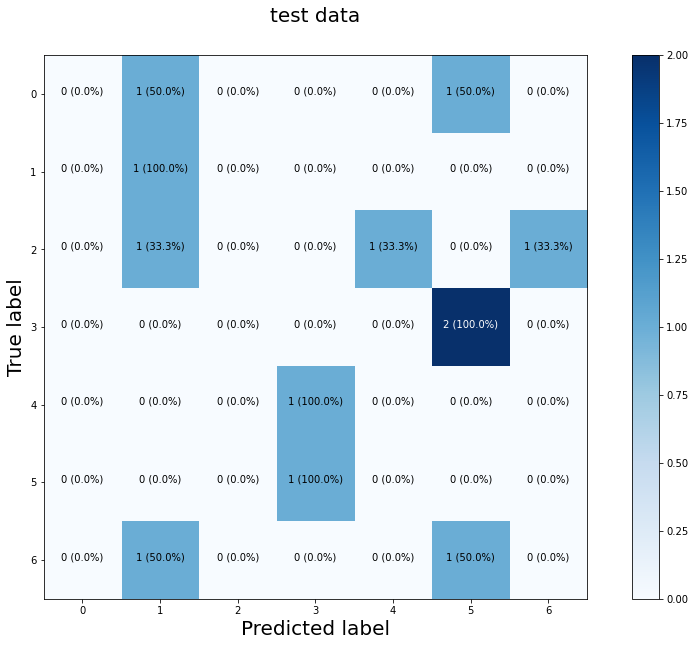

In [ ]:
predictions = check_accuracy(X_train_new, y_train, X_test_new, y_test, predict_corr, compute_cov=False)
plot_confusion(y_train, predictions['train'], y_test, predictions['test'])

train accuracy: 11.538461538461538%
test accuracy: 8.333333333333332%


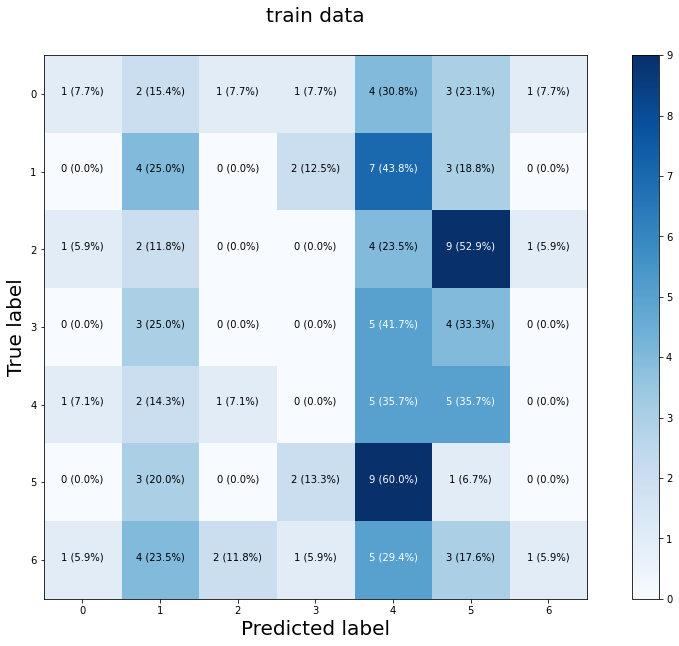

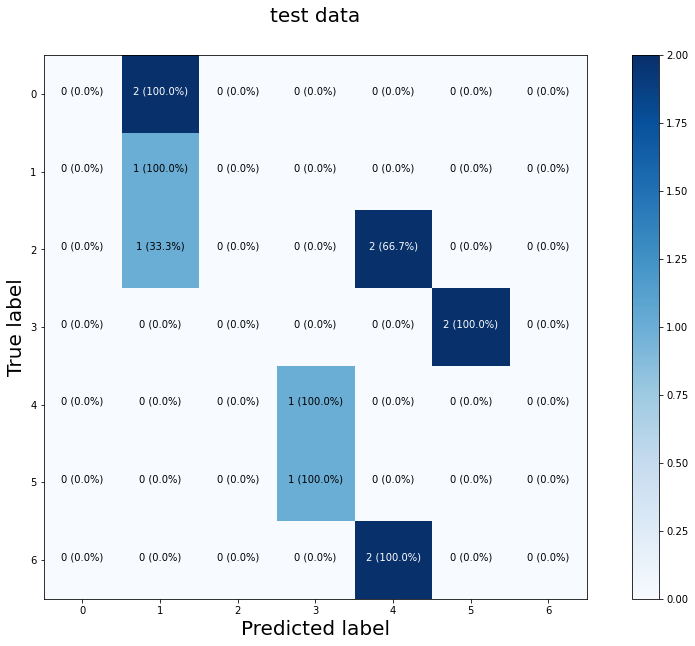

In [ ]:
predictions = check_accuracy(X_train_new, y_train, X_test_new, y_test, predict_cos, compute_cov=False)
plot_confusion(y_train, predictions['train'], y_test, predictions['test'])

train accuracy: 13.461538461538462%
test accuracy: 8.333333333333332%


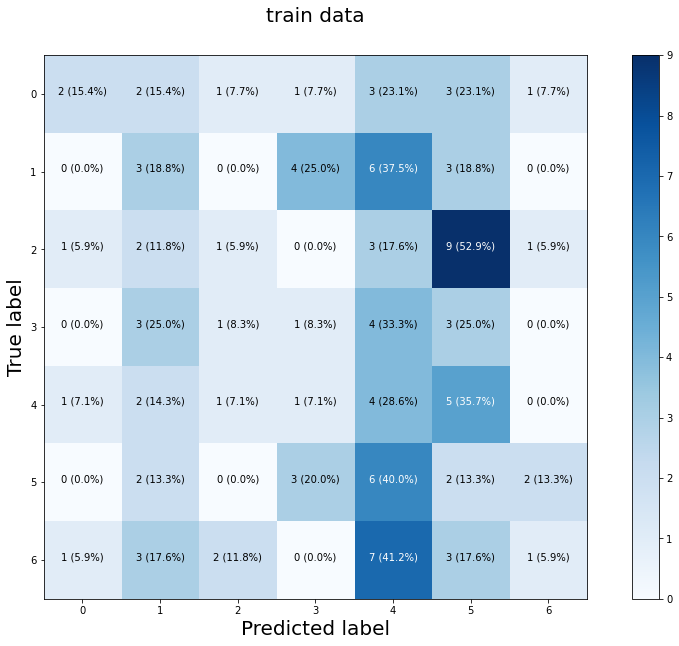

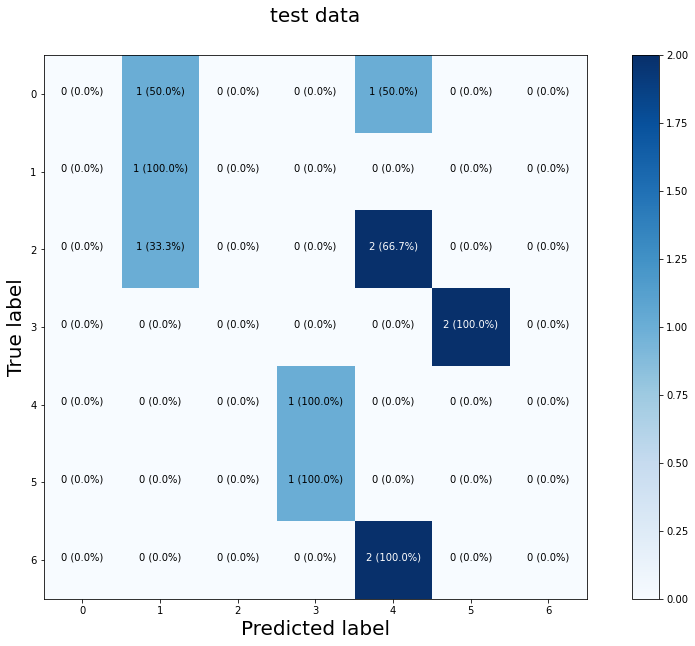

In [ ]:
predictions = check_accuracy(X_train_new, y_train, X_test_new, y_test, predict_norm, compute_cov=False)
plot_confusion(y_train, predictions['train'], y_test, predictions['test'])

## Computing PCA for correlation matrices

In [ ]:
covariance_matrix = np.corrcoef(electrode_correlations.T)
covariance_matrix.shape

(1176, 1176)

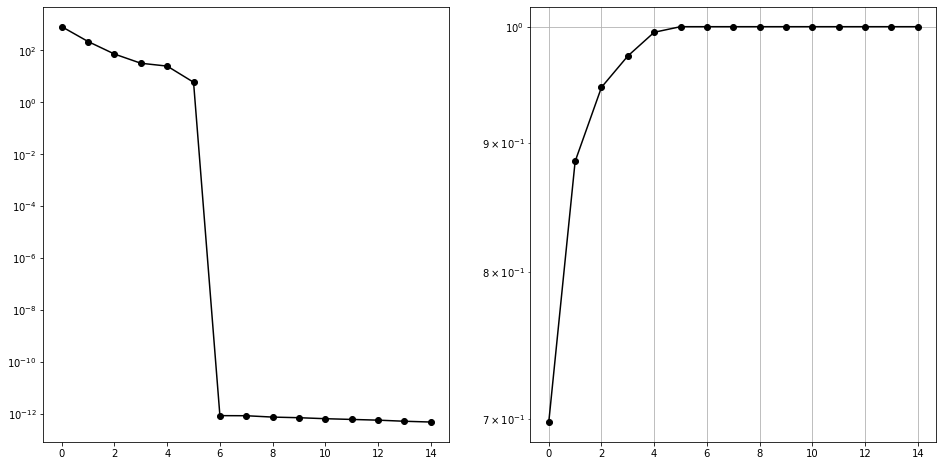

In [ ]:
U, S, VT = np.linalg.svd(covariance_matrix, full_matrices=False)

fig1 = plt.figure(figsize=(16, 8))

ax1 = fig1.add_subplot(121)
ax1.semilogy(S[:15], '-o', c='black')

ax1 = fig1.add_subplot(122)
ax1.semilogy(np.cumsum(S[:15]) / np.sum(S[:15]), '-o', c='black')
ax1.grid()

In [ ]:
(np.cumsum(S) / np.sum(S))[2]

0.9463793568429955

In [ ]:
phon_correlations = np.empty((0, 1176))

for x in X_train:
  v, _ = get_covariance(x.T)
  phon_correlations = np.append(phon_correlations, np.expand_dims(v, axis=0), axis=0)

phon_correlations.shape

(104, 1176)

Using 3 singular basis vectors

In [ ]:
basis = U[:, :3]
projections = basis.T @ electrode_correlations.T
projections.shape

(3, 7)

In [ ]:
# projecting other phonemes

phon_projections = basis.T @ phon_correlations.T
phon_projections.shape

(3, 104)

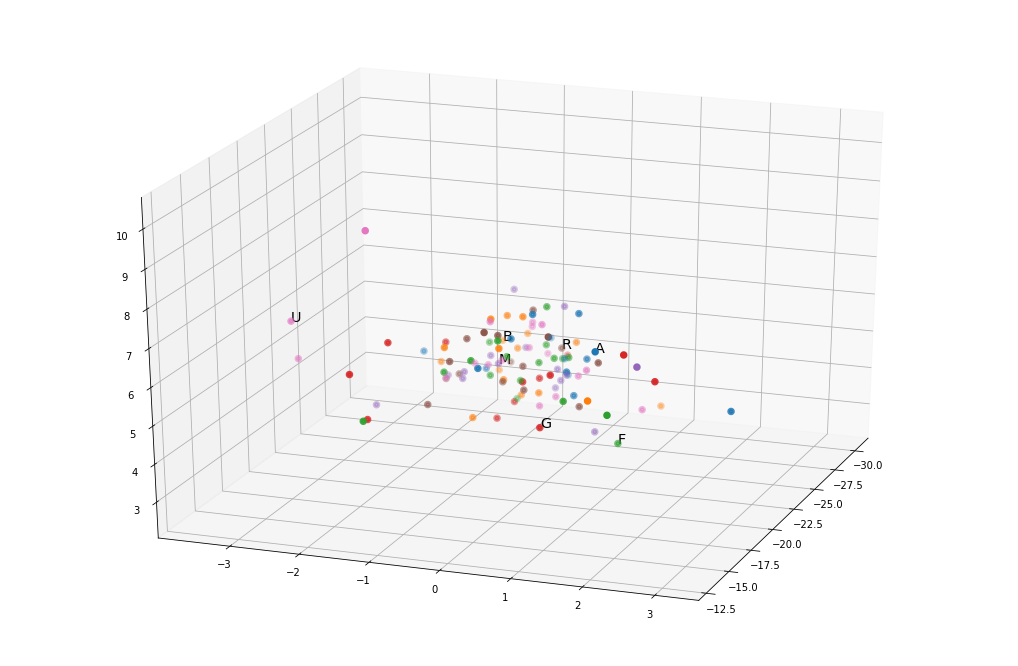

In [ ]:
fig1 = plt.figure(figsize=(18, 12))
ax = fig1.add_subplot(111, projection='3d')

phon_labels = ['A', 'B', 'F', 'G', 'M', 'R', 'U']
phon_inds = np.arange(11, 18, dtype=int)

for i, dot in enumerate(projections.T):
  phons = phon_projections.T[y_train == phon_inds[i]].T
  phons = np.append(np.expand_dims(dot, axis=-1), phons, axis=-1)
  ax.scatter(phons[0], phons[1], phons[2], marker='o', linewidths=3)
  ax.text(dot[0], dot[1], dot[2], phon_labels[i], size='x-large')

ax.view_init(25, 20)
plt.show()

Using 4 basis vectors

In [ ]:
basis = U[:, :4]
projections = basis.T @ electrode_correlations.T
print(projections.shape)

phon_projections = basis.T @ phon_correlations.T
phon_projections.shape

(4, 7)


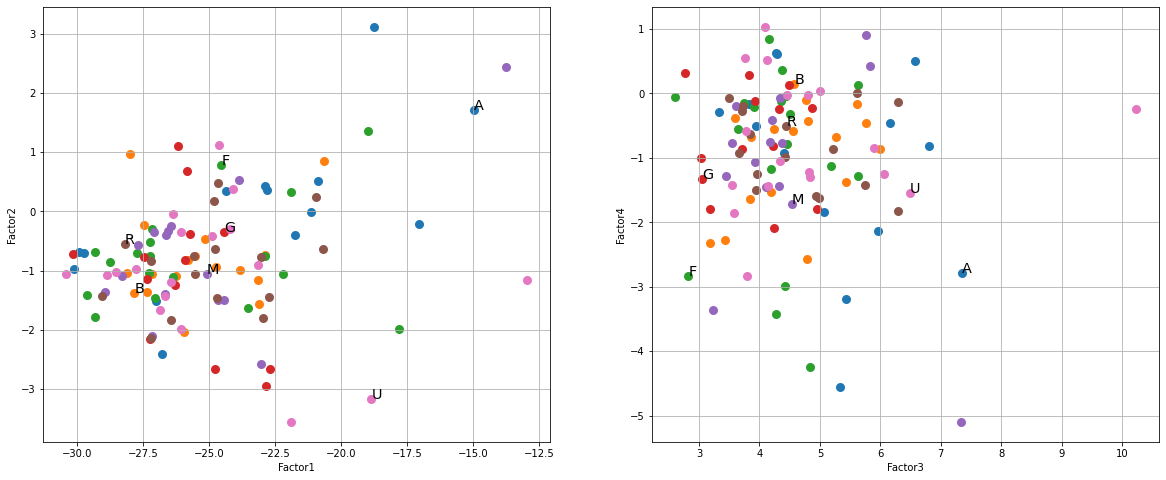

In [ ]:
fig = plt.figure(figsize=(20, 8))

ax1 = fig.add_subplot(121)

plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.grid()

ax2 = fig.add_subplot(122)

plt.xlabel('Factor3')
plt.ylabel('Factor4')
plt.grid()

for i, dot in enumerate(projections.T):
  phons = phon_projections.T[y_train == phon_inds[i]].T
  phons = np.append(np.expand_dims(dot, axis=-1), phons, axis=-1)
  ax1.scatter(phons[0], phons[1], marker='o', linewidths=3)
  ax1.text(dot[0], dot[1], phon_labels[i], size='x-large')

  ax2.scatter(phons[2], phons[3], marker='o', linewidths=3)
  ax2.text(dot[2], dot[3], phon_labels[i], size='x-large')

#### Note:

Means are not centered since we took mean `before` computing correlations.

## Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
variances = np.empty(0)

for number_of_vectors in range(1, 16):

  print(f'Testing {number_of_vectors} vectors...')
  basis = U[:, :number_of_vectors]
  phon_projections = basis.T @ phon_correlations.T
  kmeans = KMeans(n_clusters=7, random_state=32).fit(phon_projections.T)

  variance = np.empty(0)
  for i in range(11, 18):
    variance = np.append(variance,
                         np.var(kmeans.predict(phon_projections.T[y_train == i])))
  variances = np.append(variances, np.mean(variance))

Testing 1 vectors...
Testing 2 vectors...
Testing 3 vectors...
Testing 4 vectors...
Testing 5 vectors...
Testing 6 vectors...
Testing 7 vectors...
Testing 8 vectors...
Testing 9 vectors...
Testing 10 vectors...
Testing 11 vectors...
Testing 12 vectors...
Testing 13 vectors...
Testing 14 vectors...
Testing 15 vectors...


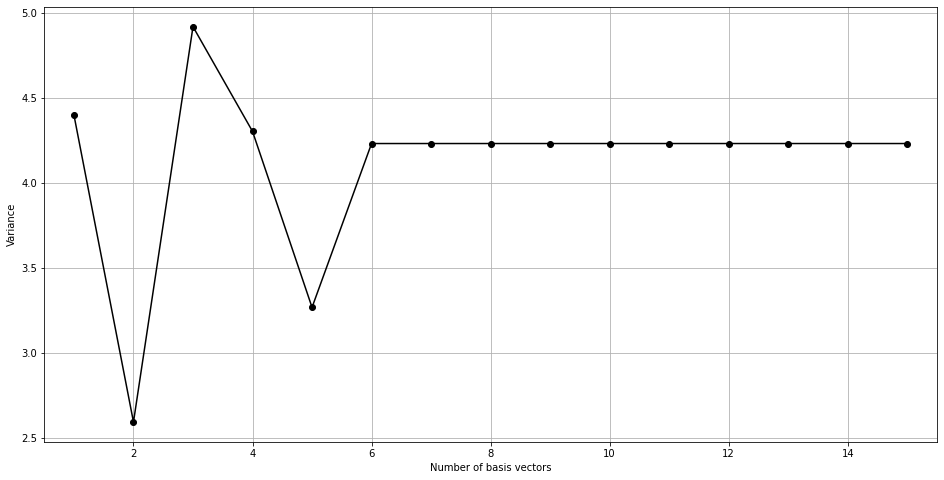

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1, 16), variances, color='black', marker='o')
plt.xlim([0.5, 15.5])
plt.xlabel('Number of basis vectors')
plt.ylabel('Variance')
plt.grid()

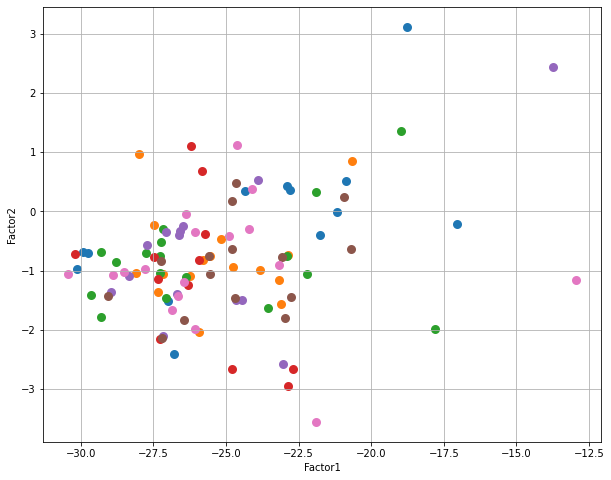

In [ ]:
# 2 basis vectors

basis = U[:, :2]
phon_projections = basis.T @ phon_correlations.T

fig = plt.figure(figsize=(10, 8))

plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.grid()

for i in range(11, 18):
  phons = phon_projections.T[y_train == i].T
  plt.scatter(phons[0], phons[1], marker='o', linewidths=3)

## PCA for listen-repeat-noise dataset

In [2]:
with h5py.File('/content/drive/MyDrive/EEG_data/listen_repeat_noise.h5', 'r') as hdf:
  listen = hdf['listen'][:]
  repeat = hdf['repeat'][:]
  noise = hdf['noise'][:]
  labels = hdf['labels'][:]

listen.shape

(116, 300, 49)

Meaned shape: (7, 300, 49)


(7, 1176)

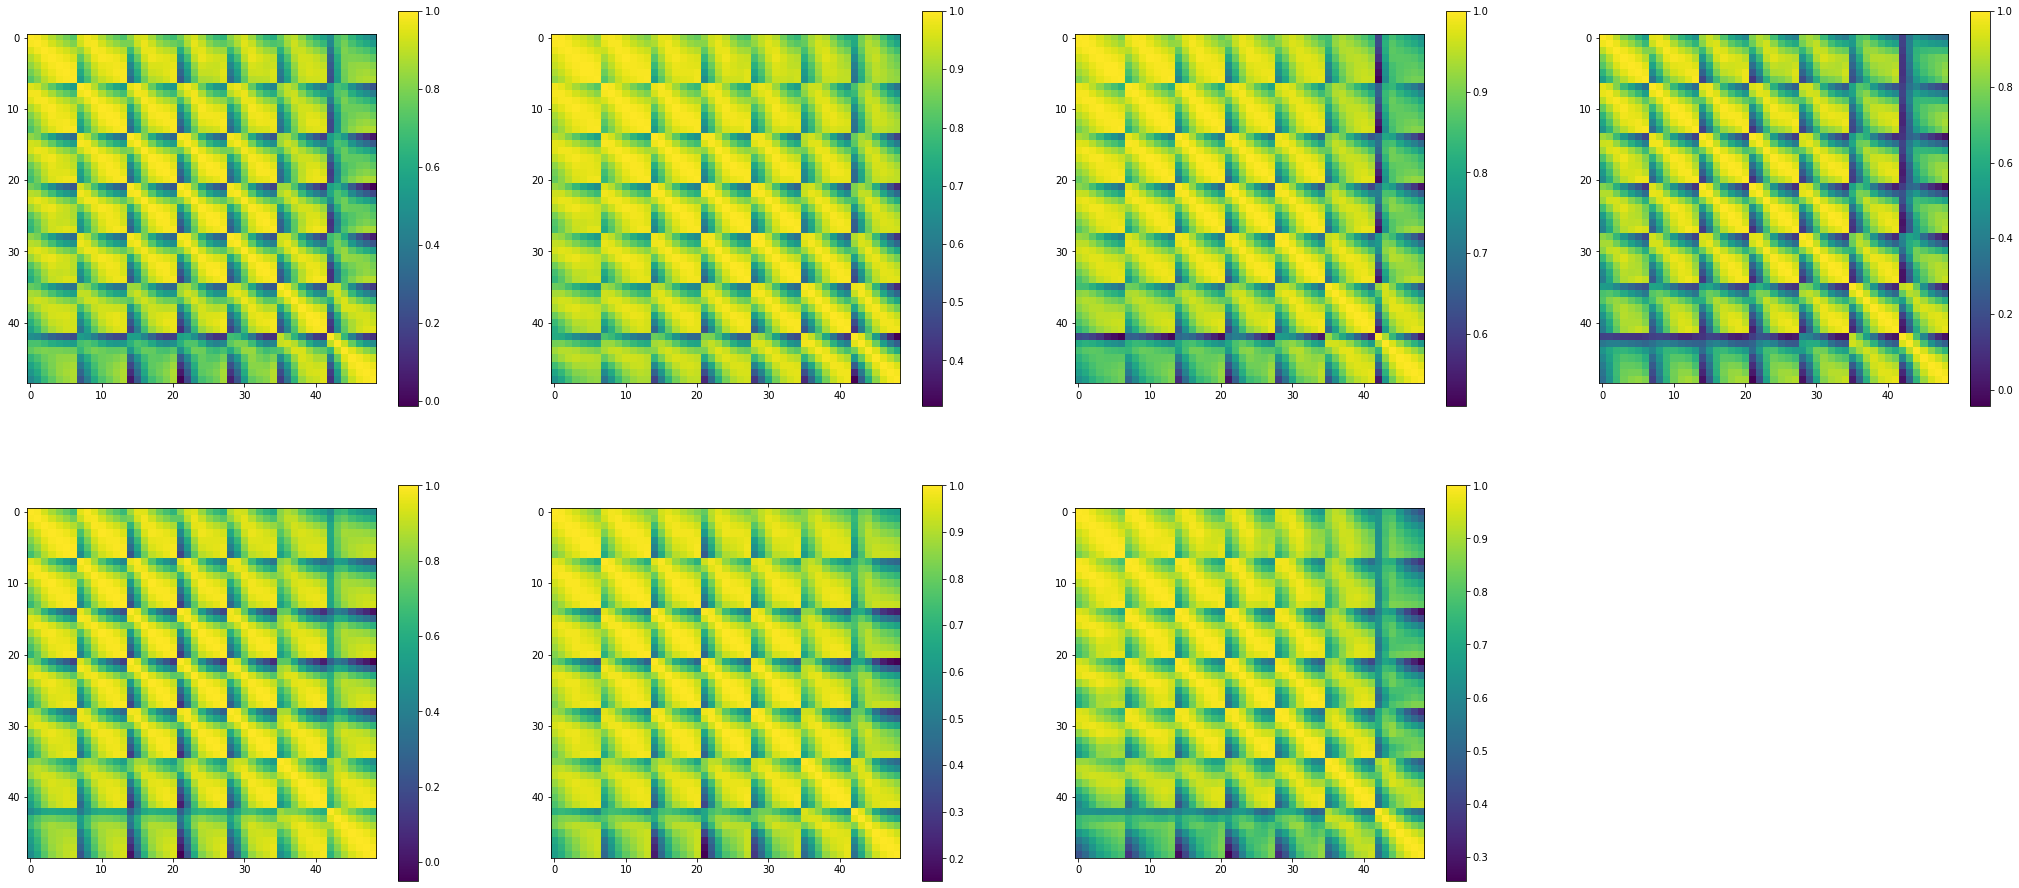

In [5]:
# computing mean in repeat

meaned = np.empty((0, 300, 49))

for label in np.unique(labels):
  m = np.mean(repeat[labels == label], keepdims=True, axis=0)
  meaned = np.append(meaned, m, axis=0)

print(f'Meaned shape: {meaned.shape}')

electrode_correlations = np.empty((0, 1176))
fig = plt.figure(figsize=(9 * 4, 8 * 2))

for phoneme in range(7):

  triu, covariance_matrix = get_covariance(meaned[phoneme].T)
  electrode_correlations = np.append(electrode_correlations,
                                     np.expand_dims(triu, axis=0),
                                     axis=0)
  ax = fig.add_subplot(2, 4, phoneme + 1)
  img = ax.imshow(covariance_matrix)
  plt.colorbar(img, ax=ax)
  
electrode_correlations.shape

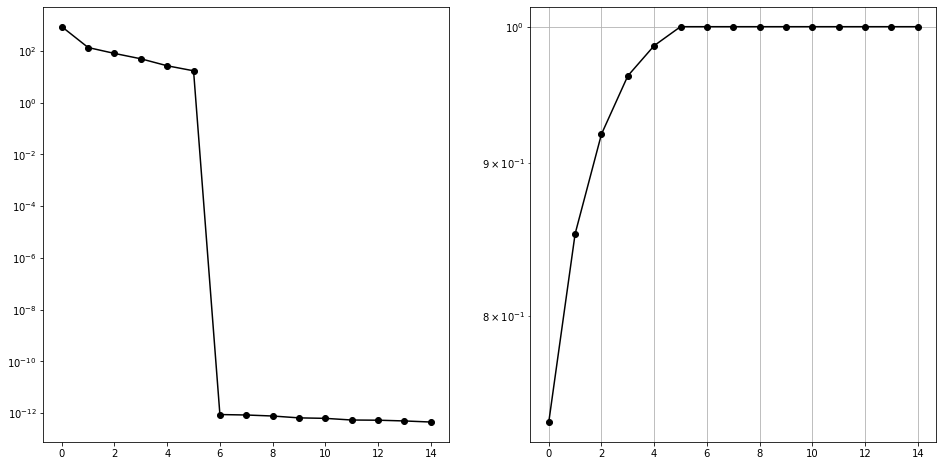

In [6]:
covariance_matrix = np.corrcoef(electrode_correlations.T)

U, S, VT = np.linalg.svd(covariance_matrix, full_matrices=False)

fig1 = plt.figure(figsize=(16, 8))

ax1 = fig1.add_subplot(121)
ax1.semilogy(S[:15], '-o', c='black')

ax1 = fig1.add_subplot(122)
ax1.semilogy(np.cumsum(S[:15]) / np.sum(S[:15]), '-o', c='black')
ax1.grid()

In [7]:
def into_correlation_domain(X):
  '''
  Transforms neural responses into correlations

  Args:
  X -- np.array of shape (None, 300, 49)

  Returns:
  corrs -- np.array of shape (None, 1176)
  '''
  phon_correlations = np.empty((0, 1176))

  for x in X:
    v, _ = get_covariance(x.T)
    phon_correlations = np.append(phon_correlations, np.expand_dims(v, axis=0), axis=0)

  return phon_correlations

In [8]:
listen = into_correlation_domain(listen)
repeat = into_correlation_domain(repeat)
noise = into_correlation_domain(noise)

listen.shape, repeat.shape, noise.shape

((116, 1176), (116, 1176), (116, 1176))

In [9]:
listen_3 = U[:, :3].T @ listen.T
repeat_3 = U[:, :3].T @ repeat.T
noise_3 = U[:, :3].T @ noise.T

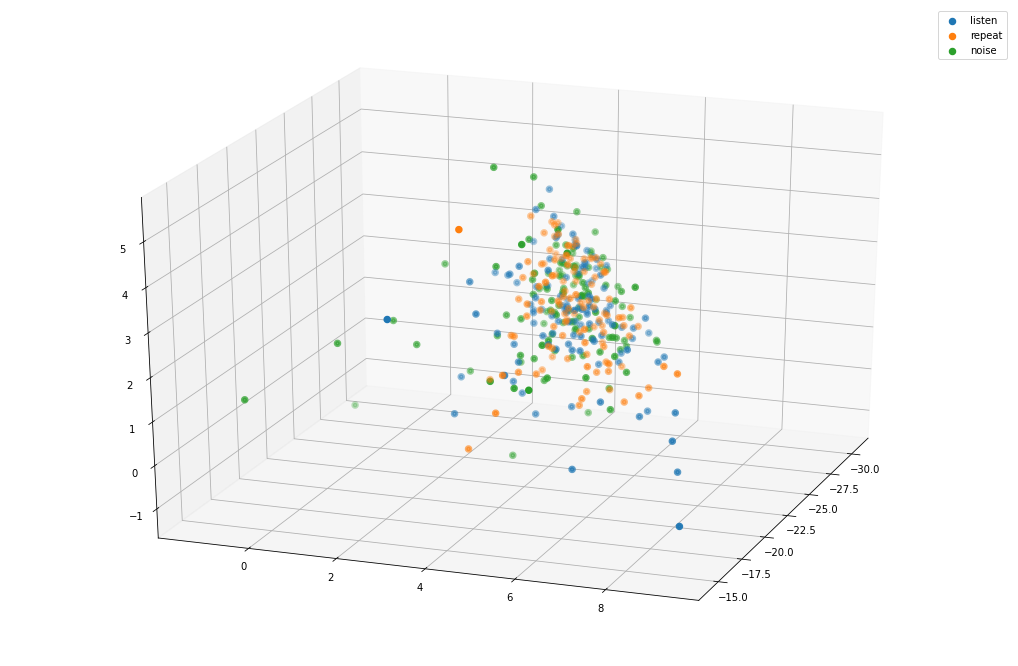

In [10]:
fig1 = plt.figure(figsize=(18, 12))
ax = fig1.add_subplot(111, projection='3d')

ax.scatter(listen_3[0], listen_3[1], listen_3[2], marker='o',
           linewidths=3, label='listen')
ax.scatter(repeat_3[0], repeat_3[1], repeat_3[2], marker='o',
           linewidths=3, label='repeat')
ax.scatter(noise_3[0], noise_3[1], noise_3[2], marker='o',
           linewidths=3, label='noise')

ax.view_init(25, 20)
plt.legend()
plt.show()

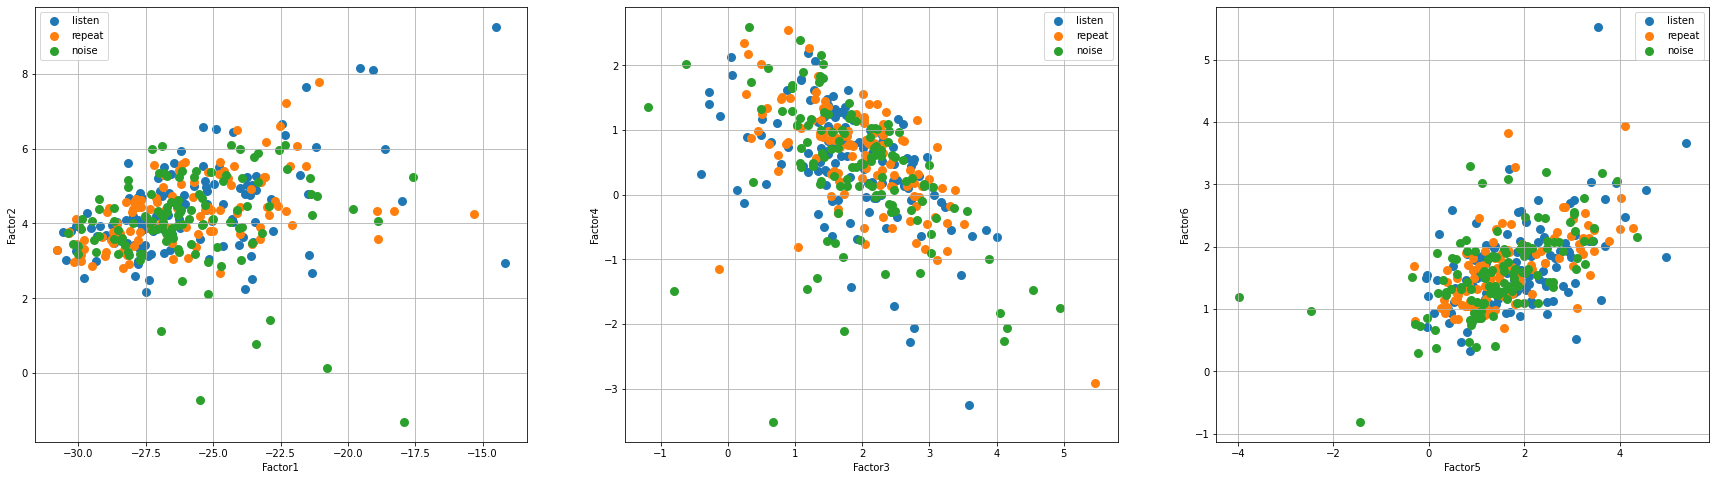

In [11]:
# projecting onto 6 vectors

listen_6 = U[:, :6].T @ listen.T
repeat_6 = U[:, :6].T @ repeat.T
noise_6 = U[:, :6].T @ noise.T

fig = plt.figure(figsize=(30, 8))

ax1 = fig.add_subplot(131)

plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.grid()
ax1.scatter(listen_6[0], listen_6[1], marker='o',
           linewidths=3, label='listen')
ax1.scatter(repeat_6[0], repeat_6[1], marker='o',
           linewidths=3, label='repeat')
ax1.scatter(noise_6[0], noise_6[1], marker='o',
           linewidths=3, label='noise')
plt.legend()

ax2 = fig.add_subplot(132)

plt.xlabel('Factor3')
plt.ylabel('Factor4')
plt.grid()
ax2.scatter(listen_6[2], listen_6[3], marker='o',
           linewidths=3, label='listen')
ax2.scatter(repeat_6[2], repeat_6[3], marker='o',
           linewidths=3, label='repeat')
ax2.scatter(noise_6[2], noise_6[3], marker='o',
           linewidths=3, label='noise')
plt.legend()

ax3 = fig.add_subplot(133)

plt.xlabel('Factor5')
plt.ylabel('Factor6')
plt.grid()
ax3.scatter(listen_6[4], listen_6[5], marker='o',
           linewidths=3, label='listen')
ax3.scatter(repeat_6[4], repeat_6[5], marker='o',
           linewidths=3, label='repeat')
ax3.scatter(noise_6[4], noise_6[5], marker='o',
           linewidths=3, label='noise')
plt.legend()